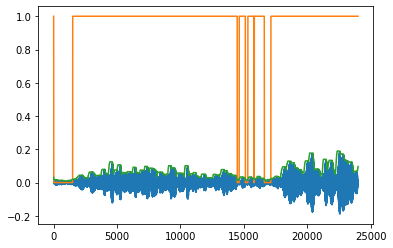

1000000
(58, 12000)
1.1696177146784148e-16 1.0


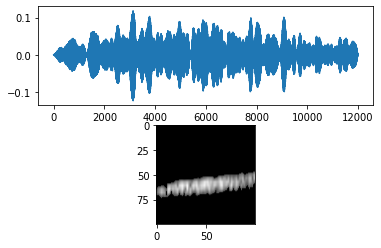

Keep(y/n)? : n
-1.7630741401041065e-16 0.9999999999999998


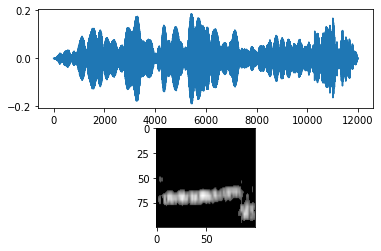

Keep(y/n)? : n
8.723260198418315e-18 1.0


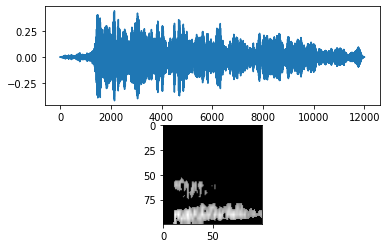

Keep(y/n)? : n
-6.659832216083778e-17 0.9999999999999999


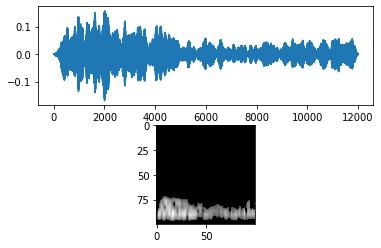

Keep(y/n)? : n
0.0 1.0


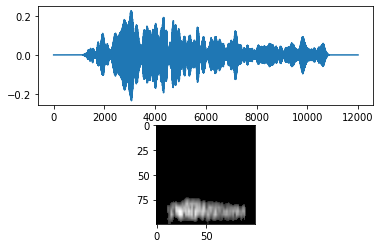

Keep(y/n)? : n
1.9793746264264906e-16 1.0000000000000002


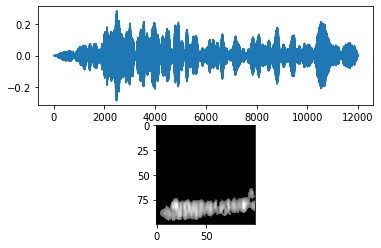

Keep(y/n)? : n
3.701512242814448e-17 1.0


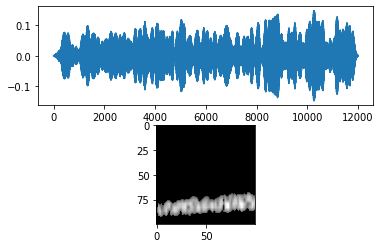

Keep(y/n)? : n
-1.1102230246251565e-16 0.9999999999999999


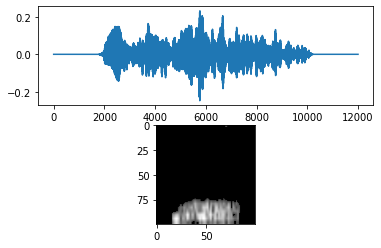

Keep(y/n)? : n
-2.220446049250313e-16 0.9999999999999998


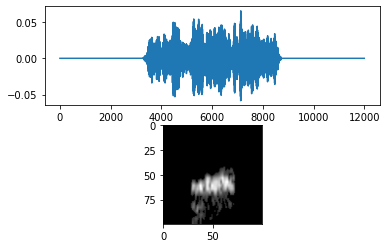

Keep(y/n)? : n
0.0 0.9999999999999999


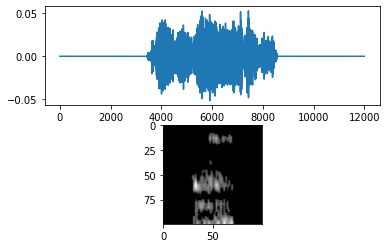

Keep(y/n)? : n
-2.1584945543838405e-16 0.9999999999999998


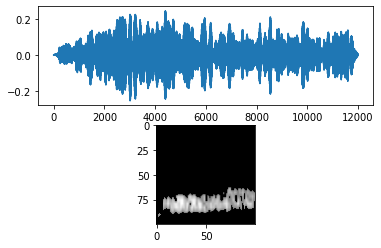

Keep(y/n)? : n
-2.1476305294084763e-17 1.0


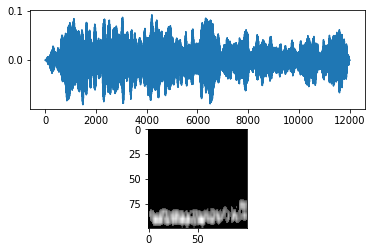

Keep(y/n)? : n
2.6581062879823447e-20 0.9999999999999999


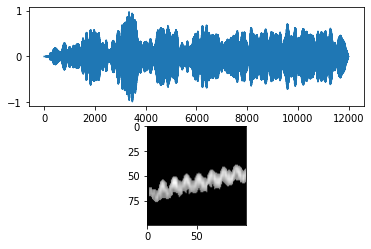

Keep(y/n)? : y
-1.3602141496657747e-16 0.9999999999999999


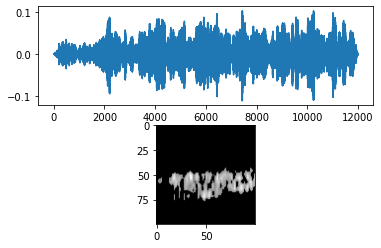

Keep(y/n)? : n
1.4878290334068206e-16 1.0


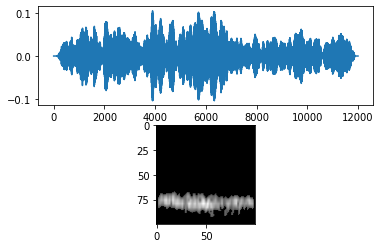

Keep(y/n)? : n
-8.38216567462331e-17 1.0


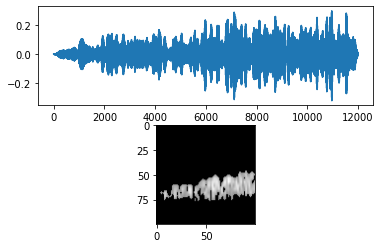

Keep(y/n)? : n
1.2073778121971333e-16 1.0


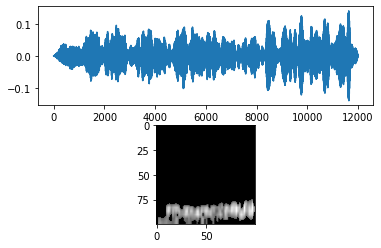

Keep(y/n)? : n
7.172723573406819e-17 1.0


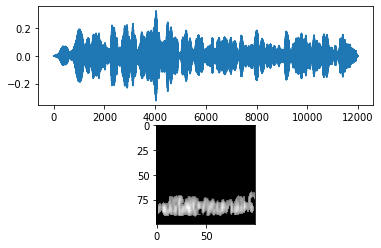

Keep(y/n)? : n
-1.509169557022949e-17 1.0


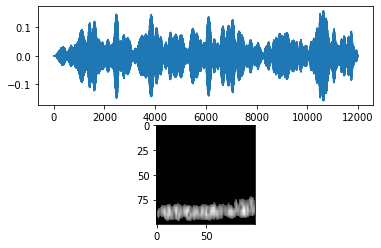

Keep(y/n)? : n
-9.28315231662235e-17 0.9999999999999998


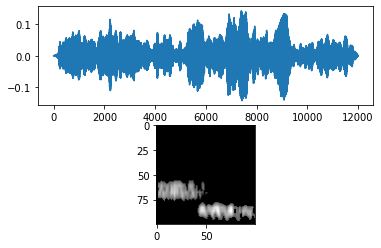

Keep(y/n)? : n
1.676381438989421e-16 1.0000000000000002


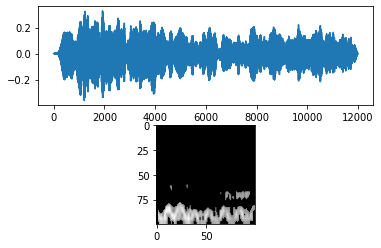

Keep(y/n)? : y
8.051875363942783e-17 1.0


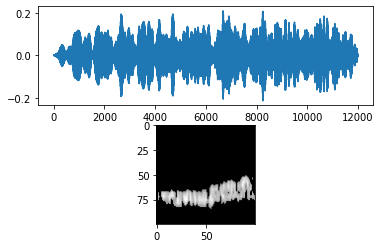

Keep(y/n)? : n
-4.9203469074321285e-17 1.0


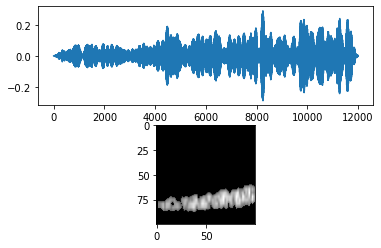

Keep(y/n)? : n
5.551115123125783e-17 1.0


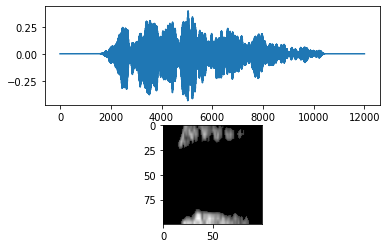

Keep(y/n)? : n
-5.950603757929401e-17 1.0


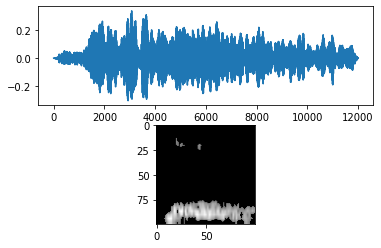

Keep(y/n)? : n
-8.802741949059883e-17 0.9999999999999999


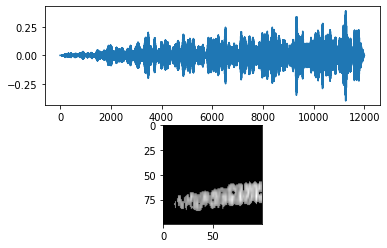

Keep(y/n)? : n
-6.116819412039849e-18 1.0


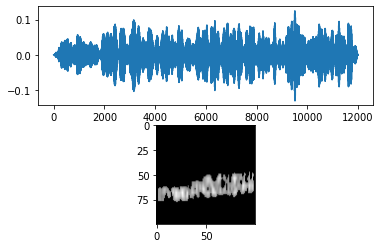

Keep(y/n)? : n
1.4109506629755186e-16 1.0000000000000002


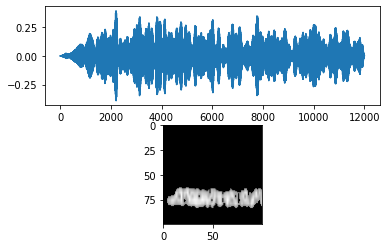

Keep(y/n)? : n
-4.9253043784804154e-17 1.0


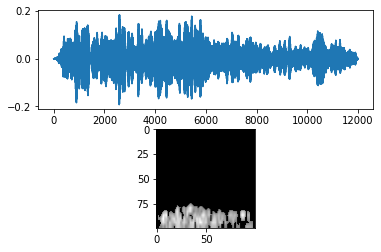

Keep(y/n)? : n
7.872255034829004e-18 1.0


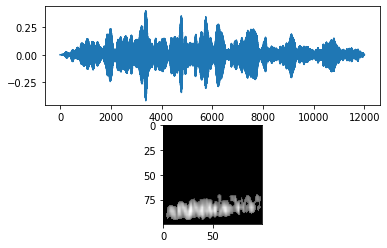

Keep(y/n)? : y
2.220446049250313e-16 1.0000000000000002


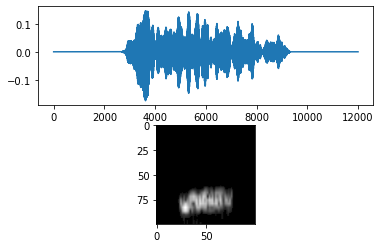

Keep(y/n)? : n
1.0208317697431798e-16 1.0


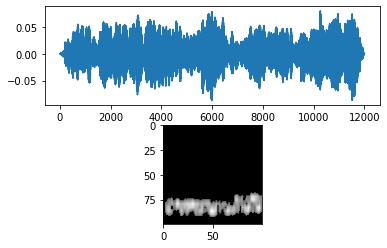

Keep(y/n)? : n
8.90160773308361e-18 1.0


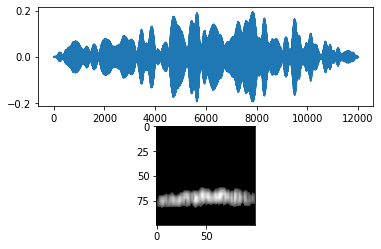

Keep(y/n)? : n
-2.840039227959064e-17 1.0


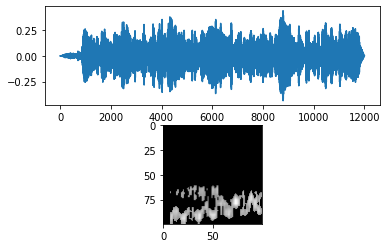

Keep(y/n)? : n
-2.220446049250313e-16 0.9999999999999997


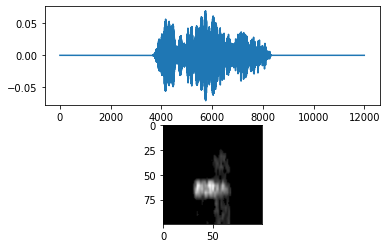

Keep(y/n)? : n
7.12268019878262e-17 1.0000000000000002


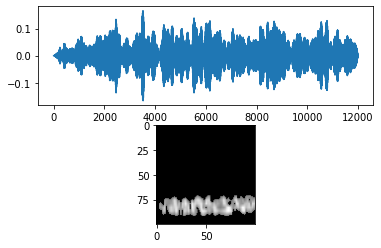

Keep(y/n)? : n
8.335997258766517e-17 1.0


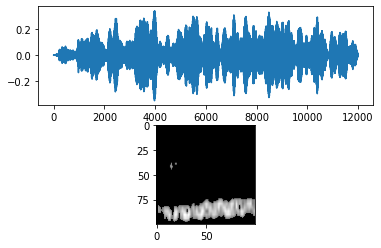

Keep(y/n)? : n
-2.0868351035245598e-16 0.9999999999999999


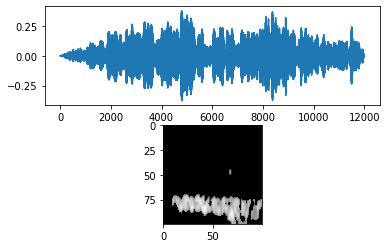

Keep(y/n)? : n
-1.1919864668714001e-16 0.9999999999999999


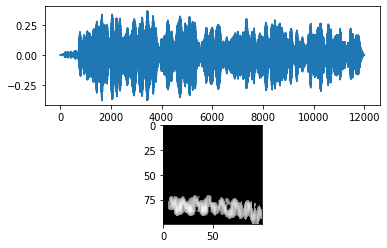

Keep(y/n)? : y
0.0 1.0


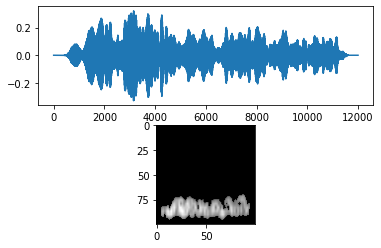

Keep(y/n)? : n
1.1102230246251565e-16 1.0000000000000002


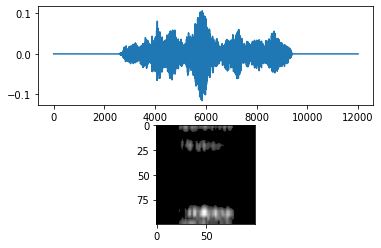

Keep(y/n)? : n
1.6719019822399171e-16 1.0000000000000002


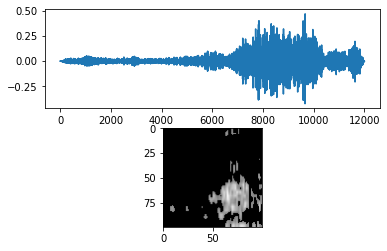

Keep(y/n)? : n
-1.054426331725806e-16 0.9999999999999999


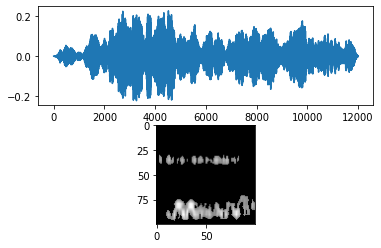

Keep(y/n)? : y
-1.7702727115434676e-16 0.9999999999999998


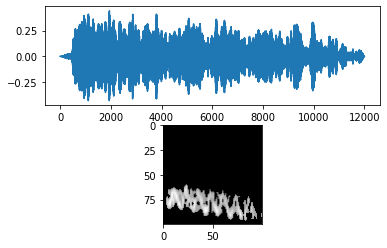

Keep(y/n)? : y
1.1102230246251565e-16 1.0000000000000002


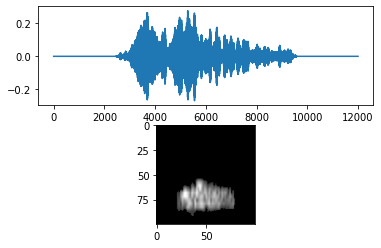

Keep(y/n)? : n
-1.4340478811007031e-16 0.9999999999999998


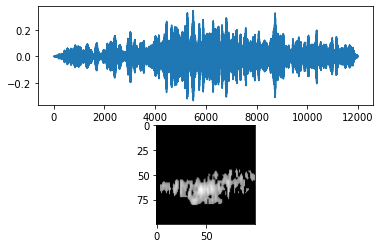

Keep(y/n)? : n
1.6707694446734534e-16 1.0000000000000002


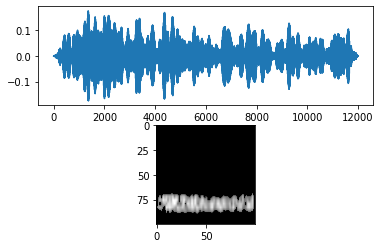

Keep(y/n)? : n
1.9361019161578708e-17 1.0


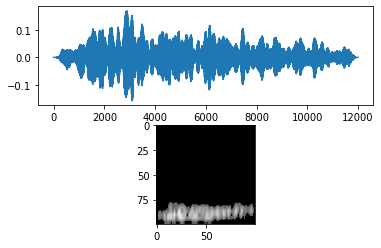

Keep(y/n)? : n
-1.2545582842860898e-16 0.9999999999999999


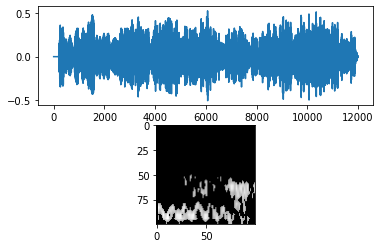

Keep(y/n)? : n
-6.121369313910729e-17 0.9999999999999999


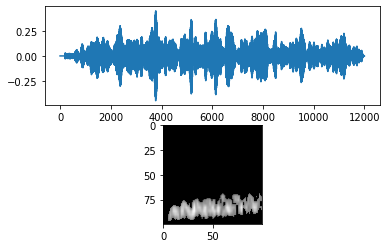

Keep(y/n)? : y
-1.4725411573572503e-16 0.9999999999999999


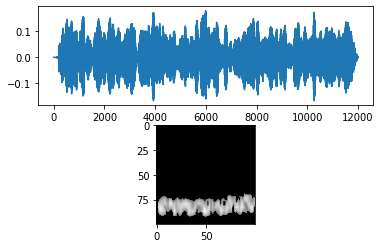

Keep(y/n)? : n
-5.042291211390816e-17 1.0


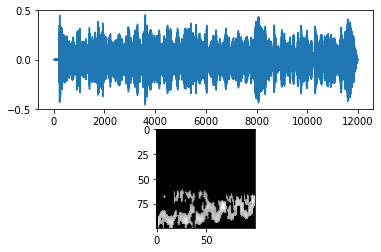

Keep(y/n)? : n
4.816182266226045e-17 1.0


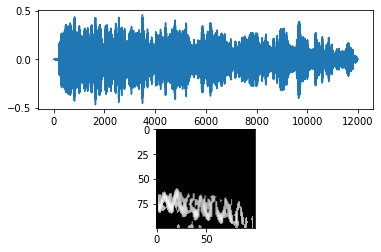

Keep(y/n)? : y
-1.7053034683317308e-16 0.9999999999999998


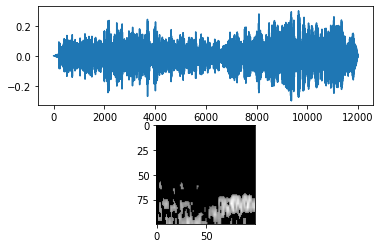

Keep(y/n)? : n
6.38320069538236e-17 1.0000000000000002


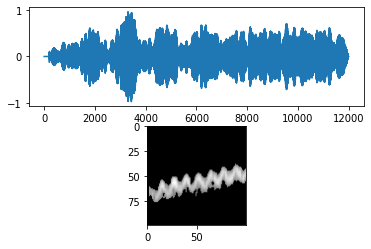

Keep(y/n)? : y
-1.1102230246251565e-16 0.9999999999999999


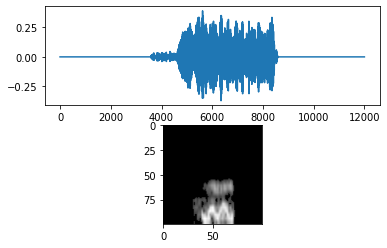

Keep(y/n)? : y
-2.205520210118725e-16 0.9999999999999998


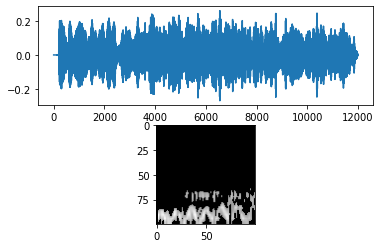

Keep(y/n)? : y
0.0 1.0


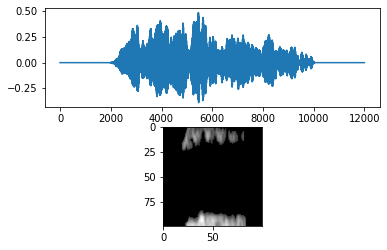

Keep(y/n)? : n
(11, 10000)


In [21]:
import wave
import os
import glob
import soundfile as sf
from scipy.signal import spectrogram, butter, lfilter, decimate, hilbert, resample
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

    
VOLUME_AMP_MULTIPLE = 20
NPERSEG = 256
NOVERLAP = int(NPERSEG * 0.25)
WINDOW = 'hanning'
SPECTROGRAM_RAW_LOW = 1
SPECTROGRAM_RAW_HIGH = 4
SPECTROGRAM_POWER_FACTOR = 4
LOWCUT = 4500
HIGHCUT = 9500
SPECTROGRAM_HEIGHT = int(64)
morph_elem = 0
morph_size = 0
morph_operator = 0
element=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))

def fade_in(data, samples):
    samples=math.ceil(samples)
    g=np.linspace(0,1,samples)
    data[: samples]=np.multiply(data[:samples],g)
    return data;

def fade_out(data, samples):
    samples=math.ceil(samples)
    g=np.linspace(1,0,samples)
    data[(len(data)-samples) :]=np.multiply(data[(len(data)-samples) :],g)
    return data;

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
    
def getEnvelope(inputSignal,intervalLength):
    absoluteSignal = []
    print('getting envelope..')
    for sample in inputSignal:
        absoluteSignal.append (abs (sample))
    outputSignal = []
    for baseIndex in range (0, len (absoluteSignal)):
        maximum = 0
        for lookbackIndex in range (intervalLength):
            maximum = max (absoluteSignal [baseIndex - lookbackIndex], maximum)
        outputSignal.append (maximum)
    print('done getting envelope..')
    return outputSignal 


def wav_to_spectrogram(data, samplerate): 
    #makes spectrogram, resizes to 100 square, flattens    
    f, t, spec = spectrogram(data,fs=float(samplerate),window=WINDOW,nperseg=NPERSEG,noverlap=NOVERLAP,mode='magnitude')    
    sel=np.where(np.logical_and(f>=5000, f<=10000))
    spec=spec[sel][:]
    spec=np.flipud(spec)
    spec=spec+0.0001
    #spec(np.nonzero(spec))=spec(np.nonzero(spec)))
    spec=np.log10(spec)*20
    spec = cv2.resize(spec, (100, 100))  
    norm_image = np.zeros((100,100))
    cv2.normalize(spec, norm_image, 0, 1, norm_type=cv2.NORM_MINMAX)
    print(np.min(norm_image), np.max(norm_image))
    tmp = norm_image.reshape(1,10000)
    p = np.percentile(tmp, 85)
    th, im_th = cv2.threshold(norm_image, p, 1, cv2.THRESH_TOZERO)
    #im=im_th
    im = im_th.reshape(1,10000)    
    return im;    
    

#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)    
    
    
def load_wavs(directory):
    os.chdir(directory)
    wavefiles = glob.glob('*.wav')
    imstack=pd.DataFrame()
    for idx, wavefile in enumerate(wavefiles):
        data, samplerate = sf.read(wavefile) 
        data=fade_in(data,0.005*samplerate)
        data=fade_out(data,0.005*samplerate)
        target_length=round(samplerate*0.5)
        actual_length=len(data)
        difference=target_length-actual_length
        d=round(difference/2)
    
        if(d>0):
            data=np.pad(data, (d, d), 'constant')
        if(d<0):
            d=d*-1
            data=data[d :]
            q=len(data)-d
            data=data[: q]  
    
        f, t, spec = spectrogram(data,fs=float(samplerate),window=WINDOW,nperseg=NPERSEG,noverlap=NOVERLAP,mode='magnitude')
        spec=np.flipud(spec)
        spec=spec[:45][:]
        spec = cv2.resize(spec, (100, 100))   
        p = np.percentile(spec, 98)
        th, im_th = cv2.threshold(spec, p, 1, cv2.THRESH_BINARY)
        im = im_th.reshape(1,10000)
        if idx==0:
            imstack=im
        if idx>0:
            imstack=np.append(imstack,im,axis=0)   
    return imstack, idx;

def max_rolling1(a, window,axis =1):
        shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
        strides = a.strides + (a.strides[-1],)
        rolling = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
        return np.max(rolling,axis=axis)

def load_wavs_chop(filename):
    wavefiles = glob.glob('*.wav')
    data, samplerate = sf.read(filename)
    data=data*100
    data=butter_bandpass_filter(data, 4000, 10000, samplerate, order=5)
    
    plt.plot(data[:round(0.5*samplerate)])# plotting the graph
   
    data_ds=decimate(data, 4)
    samplerate_ds=int(samplerate/4)
    data_ds=data
    samplerate_ds=samplerate
    
    analytic_signal = hilbert(data_ds)
    amplitude_envelope = np.abs(analytic_signal)
    #amplitude_envelope = moving_avg(amplitude_envelope,500)
    amplitude_envelope = max_rolling1(amplitude_envelope,200)
    #amplitude_envelope=getEnvelope(data_ds,400)
    #plt.plot(amplitude_envelope)# plotting the graph
    #plt.show() #Displaying the figures
    call=np.zeros(len(amplitude_envelope), dtype=float, order='C')
    #print(len(call))
    envelope_threshold=np.percentile(amplitude_envelope, 20)
    envelope_threshold=0.02
    for i in range(0, len(call)):
        if(amplitude_envelope[i]>envelope_threshold):
            call[i]=1
    #a=resample(call, len(call)*4)
    a=call
    plt.plot(a[:round(0.5*samplerate)])   
    plt.plot(amplitude_envelope[:round(0.5*samplerate)])
    plt.show() #Displaying the figures 
    
    return call, data, data_ds, samplerate_ds, samplerate;        
   
def show_spectrograms(imstack, idx):
    rows=math.ceil(math.sqrt(idx+1))
    cols=rows
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))  
    for idx, wavefile in enumerate(wavefiles):
        im=imstack[idx][:].reshape(100,100)
        #ax.ravel()[idx].imshow(im,cmap='binary')
        ax.ravel()[idx].imshow(im,cmap='gray')
        ax.ravel()[idx].set_title(wavefiles[idx])
        ax.ravel()[idx].set_axis_off()
    plt.show()  
    
    
def show_spectrograms_column(imstack, idx):
    rows=idx+1
    cols=1
    fig, ax = plt.subplots(nrows=rows, ncols=cols ) 

    for idx, wavefile in enumerate(wavefiles):
        im=imstack[idx][:].reshape(100,100)
        #ax.ravel()[idx].imshow(im,cmap='binary')
        ax.ravel()[idx].imshow(im)
        ax.ravel()[idx].set_title(wavefiles[idx])
        ax.ravel()[idx].set_axis_off()
    fig.tight_layout()
    plt.show()      

def set_to_target_length(data,target_length):
    q=len(data)-target_length
    #print(data.shape)
    #print(target_length, len(data), q)
    if(q==0):
        data=fade_in(data,0.005*samplerate)
        data=fade_out(data,0.005*samplerate)
    if q<0:
        data=fade_in(data,0.005*samplerate)
        data=fade_out(data,0.005*samplerate)
        data=np.append(data,np.zeros(abs(q)))
        #print('q<0, ',  len(data))
    if q>0:
        data=data[:target_length]
        data=fade_in(data,0.005*samplerate)
        data=fade_out(data,0.005*samplerate) 
        #print('q>0, ', len(data))
    return data;
     
def calls_to_new_call_list(call,samplerate, samplerate_ds):   
    cnt=-1
    previous_one=0
    callstart_sec=[]
    callstop_sec=[]
    callduration_sec=[]
    for i, c in enumerate(call):
        if i==0:
            previous_one=0
            c=0
        if i>0:
            if i % 1000000 == 0:
                print(i)
            if(previous_one==0 and c==1):
                #start
                call_state=1
                cnt+=1
                callstart_sec=np.append(callstart_sec,i/samplerate_ds)
            if(previous_one==1 and c==0):
                #end
                call_state=0;
                callstop_sec=np.append(callstop_sec,i/samplerate_ds)
                #print(cnt, len(callstop_sec), len(callstart_sec))                
                callduration_sec=np.append(callduration_sec,callstop_sec[cnt]-callstart_sec[cnt])
            previous_one=c

    target_length=int(0.25*samplerate)
    calls_nwdata=pd.DataFrame()
    cntnw=-1
    for i, dur_sec in enumerate(callduration_sec):  
        if(dur_sec>0.08):
            cntnw+=1
            #print(int(callstart_sec[i]*samplerate), int(callstop_sec[i]*samplerate))
            tmp=data[int(callstart_sec[i]*samplerate):int(callstop_sec[i]*samplerate)]
            if(dur_sec>=0.25):
                #print('dur>25')
                tmp=tmp[:round(0.25*samplerate)]
                tmp=set_to_target_length(tmp,target_length) #includes fading in and out
            if(dur_sec<0.25):
                #print('dur<.25')
                tmp=fade_in(tmp,0.005*samplerate)
                tmp=fade_out(tmp,0.005*samplerate)
                d=round((target_length-len(tmp))/2)
                #print(d)
                tmp=np.pad(tmp, (d, d), 'constant')
                tmp=set_to_target_length(tmp,target_length) #includes fading in and out
   
            tmp=tmp.reshape(1,len(tmp))
            if cntnw==0:
                calls_nwdata=tmp
            if cntnw>0:
                calls_nwdata=np.append(calls_nwdata,tmp,axis=0)            
    return calls_nwdata;

    
#here we use the functions ..    

call, data, data_ds, samplerate_ds, samplerate=load_wavs_chop('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Long_filtered_Tr1.wav')    
calls_nwdata = calls_to_new_call_list(call, samplerate, samplerate_ds)
nrows=np.size(calls_nwdata, axis = 0)
imstack=pd.DataFrame()
idx=-1
keeplist=[]
print(calls_nwdata.shape)
for i in range(0, nrows):
    im_flat=wav_to_spectrogram(calls_nwdata[i], samplerate)
    #evaluate whether to keep it  
    im_flat=im_flat.reshape(1,10000)
    im_square=im_flat.reshape(100,100)
    figure= plt.figure() 
    axis1 = figure.add_subplot(2,1,1)
    axis1.plot(calls_nwdata[i])
    axis2 = figure.add_subplot(2,1,2)
    axis2.imshow(im_square*255,cmap='gray')
    plt.show()  
    keep = str(input("Keep(y/n)? : ") or "y")
    if keep == 'y':
        idx+=1
        keeplist=np.append(keeplist,i) 
        if idx==0:
            imstack=im_flat
        if idx>0:
            imstack=np.append(imstack,im_flat,axis=0)
    plt.close(figure)
print(imstack.shape)    

imstack1=pd.DataFrame(imstack)
calls_nwdata1=pd.DataFrame(calls_nwdata)
imstack1.to_pickle('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tr1.pkl')
calls_nwdata1.to_pickle('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tr1_waves.pkl')
np.savetxt('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tr1_list.csv', keeplist, delimiter=',')

#imstack.to_pickle('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Chi.pkl')
    
    
# figure= plt.figure()
# axis1 = figure.add_subplot(2,1,1)
# axis1.plot(data_ds)
# axis2 = figure.add_subplot(2,1,2)
# axis2.plot(call)

#plt.plot(amplitude_envelope)# plotting the graph
#plt.show() #Displaying the figures    
    
#directory='/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/R4good_nontsik/training_data/Chi'
#imstack, idx=load_wavs(directory)
#show_spectrograms_column(imstack, idx)
#imstack_chi=imstack

#directory='/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/R4good_nontsik/training_data/Ph'
#imstack, idx=load_wavs(directory)
#show_spectrograms(imstack, idx)
#imstack_ph=imstack

#directory='/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/R4good_nontsik/training_data/Tr'
#imstack, idx=load_wavs(directory)
#show_spectrograms(imstack, idx)
#imstack_tr=imstack

#directory='/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/R4good_nontsik/training_data/Tw'
#imstack, idx=load_wavs(directory)
#show_spectrograms(imstack, idx)
#imstack_tw=imstack

#directory='/Users/rogierlandman/from_Samsung/Python/2019_01_17-01_R4good/kerasenv/R4good_nontsik/training_data/Noise'
#imstack, idx=load_wavs(directory)
#show_spectrograms(imstack, idx)
#imstack_noise=imstack

In [182]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

infile = open('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Ph.pkl','rb')
imstack_ph=pickle.load(infile)
infile.close()

infile = open('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tr.pkl','rb')
imstack_tr=pickle.load(infile)
infile.close()

infile = open('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tr1.pkl','rb')
imstack_tr1=pickle.load(infile)
infile.close()

infile = open('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Tw.pkl','rb')
imstack_tw=pickle.load(infile)
infile.close()
    
infile = open('/Users/rogierlandman/from_Samsung/Samvaran_training_data/Chi.pkl','rb')
imstack_chi=pickle.load(infile)
infile.close()
    
print(imstack_ph.shape[0])
print(imstack_tr.shape[0])
print(imstack_tr1.shape[0])
print(imstack_tw.shape[0])
print(imstack_chi.shape[0])

df=imstack_tr
df=df.append(imstack_tr1)
df=df.append(imstack_ph)
df=df.append(imstack_tw)
df=df.append(imstack_chi)
print(df.shape[0])


ctr=0
imsize=64
for index, row in df.iterrows():
    ctr+=1
    row=row.to_numpy()
    im_square=row.reshape(100,100)
    im_small = cv2.resize(im_square, (imsize, imsize))
    im_flat=im_small.reshape(1,imsize*imsize)
    #im_flat=im_square.reshape(1,10000)
    
#     figure= plt.figure() 
#     axis1 = figure.add_subplot(2,1,1)
#     axis1.imshow(im_square*255,cmap='gray')
#     axis2 = figure.add_subplot(2,1,2)
#     axis2.imshow(im_small*255,cmap='gray')
#     plt.show()  
#     keep = str(input("Press any key: ") or "y")
#     plt.close(figure)
    
    if ctr==1:
        df_nw=pd.DataFrame(im_flat)
    else:
        q=pd.DataFrame(im_flat)
        df_nw=df_nw.append(q)
    

cat=[]
tmp=np.ones((imstack_ph.shape[0],), dtype=int) - 1
cat=np.append(cat,tmp) 
tmp=np.ones((imstack_tr.shape[0],), dtype=int)
cat=np.append(cat,tmp) 
tmp=np.ones((imstack_tr1.shape[0],), dtype=int)
cat=np.append(cat,tmp) 
tmp=np.ones((imstack_tw.shape[0],), dtype=int) + 1
cat=np.append(cat,tmp) 
tmp=np.ones((imstack_chi.shape[0],), dtype=int) + 2
cat=np.append(cat,tmp) 

df_nw_arr=df_nw.to_numpy()


#scaler = PowerTransformer()
scaler = MinMaxScaler()
fit=scaler.fit(df_nw_arr)
df_nw_arr=scaler.transform(df_nw_arr)

#np.random.shuffle(df_nw_arr)

#df_nw_arr_test=df_nw_arr[:10]
#df_nw_arr=df_nw_arr[10:]

#imstack = df_nw_arr.reshape(-1, imsize,imsize, 1)
#imstack_test = df_nw_arr_test.reshape(-1, imsize,imsize, 1)

imstack = df_nw_arr.reshape(-1, imsize,imsize)
#imstack_test = df_nw_arr_test.reshape(-1, imsize,imsize)


128
58
11
189
187
573


In [183]:
from sklearn.model_selection import train_test_split

train_X,valid_X,train_ground,valid_ground = train_test_split(imstack,
                                                             imstack, 
                                                             test_size=0.1, 
                                                             random_state=13,
                                                             shuffle=True)

In [118]:
import keras
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

batch_size = 4
epochs = 18
inChannel = 1
x, y = 100, 100
input_img = Input(shape = (x, y, inChannel))

Model: "functional_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 7, 7, 128)       

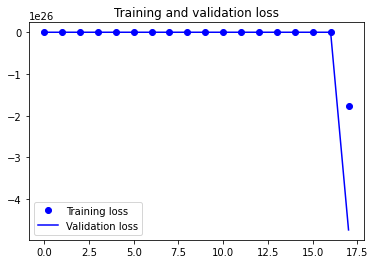

In [106]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

def autoencoder1(input_img):
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded


def autoencoder2(input_img):
    

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder = Model(input_img, autoencoder(input_img))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
# autoencoder.summary()

# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))



#autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder1 = Model(input_img, autoencoder(input_img))
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder1.summary()

autoencoder_train = autoencoder1.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))




loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Model: "functional_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_99 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 50, 50, 8)         584       
_________________________________________________________________
up_sampling2d_88 (UpSampling (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 100, 100, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
______________________________________________________

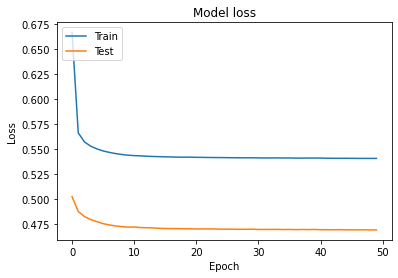

In [161]:
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

class Autoencoder():
    def __init__(self):
        self.img_rows = 100
        self.img_cols = 100
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        optimizer = Adam(lr=0.01)
        
        self.autoencoder_model = self.build_model()
        self.autoencoder_model.compile(loss='mse', optimizer=optimizer)
        self.autoencoder_model.summary()
    
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        # encoder
        h = Conv2D(8, (3, 3), activation='relu', padding='same')(input_layer)
        h = MaxPooling2D((2, 2), padding='same')(h)
        
        # decoder
        h = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
        h = UpSampling2D((2, 2))(h)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(h)
        
        return Model(input_layer, output_layer)
    
    def train_model(self, train_X, train_ground, valid_X, valid_ground, epochs, batch_size=20):
        early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')
        history = self.autoencoder_model.fit(train_X, train_ground,
                                             batch_size=batch_size,
                                             epochs=epochs,
                                             validation_data=(valid_X, valid_ground),
                                             callbacks=[early_stopping])
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
    
    def eval_model(self, x_test):
        preds = self.autoencoder_model.predict(x_test)
        return preds
    
ae = Autoencoder()
ae.train_model(train_X, train_ground, valid_X, valid_ground, epochs=10, batch_size=10)

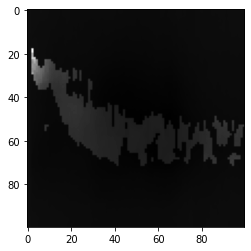

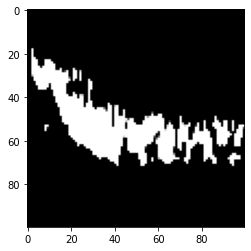

In [162]:
preds = ae.eval_model(imstack_test)
preds_0 = preds[1] * 255.0
preds_0 = preds_0.reshape(100, 100)
x_test_0 = imstack_test[1] * 255.0
x_test_0 = x_test_0.reshape(100, 100)
plt.figure()
plt.imshow(x_test_0, cmap='gray')
plt.show()
plt.figure()
plt.imshow(preds_0, cmap='gray')
plt.show()

Model: "functional_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_98 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
sequential_42 (Sequential)   (None, 128)               1280128   
_________________________________________________________________
sequential_43 (Sequential)   (None, 100, 100, 1)       1290000   
Total params: 2,570,128
Trainable params: 2,570,128
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
16/16 [==============================] - 0s 18ms/step - loss: 0.9304 - val_loss: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 14ms/step - loss: 0.7010 - val_loss: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 14ms/step - loss: 0.5993 - val_loss: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s

Epoch 72/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1716 - val_loss: 0.0000e+00
Epoch 73/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1718 - val_loss: 0.0000e+00
Epoch 74/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1716 - val_loss: 0.0000e+00
Epoch 75/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1716 - val_loss: 0.0000e+00
Epoch 76/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1718 - val_loss: 0.0000e+00
Epoch 77/200
16/16 [==============================] - 0s 15ms/step - loss: 0.1711 - val_loss: 0.0000e+00
Epoch 78/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1720 - val_loss: 0.0000e+00
Epoch 79/200
16/16 [==============================] - 0s 14ms/step - loss: 0.1721 - val_loss: 0.0000e+00
Epoch 80/200
16/16 [==============================] - 0s 16ms/step - loss: 0.1710 - val_loss: 0.0000e+00
Epoch 81/200
16/16 [==============================] - 0

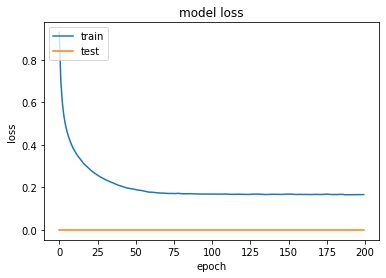

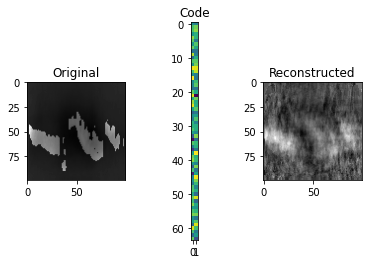

In [160]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) 
    decoder.add(Reshape(img_shape))

    return encoder, decoder

IMG_SHAPE = imstack.shape[1:]
code_size=128
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

history = autoencoder.fit(x=train_X, y=train_ground, epochs=100,
                validation_data=[valid_X, valid_ground])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

    
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    #show_image(img)
    img=np.squeeze(img)
    
    plt.imshow(img,cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    #show_image(reco)
    reco=np.squeeze(reco)
    plt.imshow(reco,cmap='gray')
    plt.show()


img = imstack_test[2]
#img=np.squeeze(img).shape
visualize(img,encoder,decoder)

In [164]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
from keras.optimizers import SGD

np.random.seed(42)
#tf.random.set_seed(42)
encoder = Sequential([Dense(2, input_shape=[3])])
decoder = Sequential([Dense(3, input_shape=[2])])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=SGD(lr=1.5))
history = autoencoder.fit(train_X, train_X, epochs=20)

Epoch 1/20


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_46 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [None, 100, 100, 1]


In [184]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.metrics import binary_accuracy
import tensorflow as tf

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

np.random.seed(42)
imsize=64
stacked_encoder = Sequential([
    Flatten(input_shape=[imsize, imsize]),
    Dense(100, activation="selu"),
    Dense(30, activation="selu"),
])
stacked_decoder = Sequential([
    Dense(100, activation="selu", input_shape=[30]),
    Dense(imsize * imsize, activation="sigmoid"),
    Reshape([imsize, imsize])
])
stacked_ae = Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=SGD(lr=1.5), metrics=[rounded_accuracy])

#train_X,valid_X,train_ground,valid_ground
history = stacked_ae.fit(train_X, train_X, epochs=250,
                         validation_data=(train_ground, train_ground))

Epoch 1/250
17/17 [==============================] - 0s 16ms/step - loss: 0.6771 - rounded_accuracy: 0.5722 - val_loss: 0.6058 - val_rounded_accuracy: 0.7302
Epoch 2/250
17/17 [==============================] - 0s 10ms/step - loss: 0.4146 - rounded_accuracy: 0.8393 - val_loss: 0.3074 - val_rounded_accuracy: 0.8656
Epoch 3/250
17/17 [==============================] - 0s 10ms/step - loss: 0.2974 - rounded_accuracy: 0.8754 - val_loss: 0.3018 - val_rounded_accuracy: 0.8756
Epoch 4/250
17/17 [==============================] - 0s 10ms/step - loss: 0.2951 - rounded_accuracy: 0.8761 - val_loss: 0.2962 - val_rounded_accuracy: 0.8761
Epoch 5/250
17/17 [==============================] - 0s 10ms/step - loss: 0.2934 - rounded_accuracy: 0.8761 - val_loss: 0.2965 - val_rounded_accuracy: 0.8760
Epoch 6/250
17/17 [==============================] - 0s 10ms/step - loss: 0.2929 - rounded_accuracy: 0.8761 - val_loss: 0.2937 - val_rounded_accuracy: 0.8760
Epoch 7/250
17/17 [==============================] -

Epoch 53/250
17/17 [==============================] - 0s 9ms/step - loss: 0.1934 - rounded_accuracy: 0.9168 - val_loss: 0.1958 - val_rounded_accuracy: 0.9125
Epoch 54/250
17/17 [==============================] - 0s 9ms/step - loss: 0.1927 - rounded_accuracy: 0.9172 - val_loss: 0.1948 - val_rounded_accuracy: 0.9156
Epoch 55/250
17/17 [==============================] - 0s 9ms/step - loss: 0.1918 - rounded_accuracy: 0.9179 - val_loss: 0.1944 - val_rounded_accuracy: 0.9174
Epoch 56/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1911 - rounded_accuracy: 0.9185 - val_loss: 0.1937 - val_rounded_accuracy: 0.9145
Epoch 57/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1904 - rounded_accuracy: 0.9188 - val_loss: 0.1917 - val_rounded_accuracy: 0.9165
Epoch 58/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1898 - rounded_accuracy: 0.9192 - val_loss: 0.1924 - val_rounded_accuracy: 0.9190
Epoch 59/250
17/17 [=============================

17/17 [==============================] - 0s 9ms/step - loss: 0.1585 - rounded_accuracy: 0.9386 - val_loss: 0.1587 - val_rounded_accuracy: 0.9389
Epoch 156/250
17/17 [==============================] - 0s 9ms/step - loss: 0.1579 - rounded_accuracy: 0.9390 - val_loss: 0.1589 - val_rounded_accuracy: 0.9378
Epoch 157/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1578 - rounded_accuracy: 0.9392 - val_loss: 0.1587 - val_rounded_accuracy: 0.9347
Epoch 158/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1575 - rounded_accuracy: 0.9391 - val_loss: 0.1588 - val_rounded_accuracy: 0.9395
Epoch 159/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1574 - rounded_accuracy: 0.9394 - val_loss: 0.1635 - val_rounded_accuracy: 0.9377
Epoch 160/250
17/17 [==============================] - 0s 10ms/step - loss: 0.1578 - rounded_accuracy: 0.9390 - val_loss: 0.1600 - val_rounded_accuracy: 0.9385
Epoch 161/250
17/17 [==============================] - 0

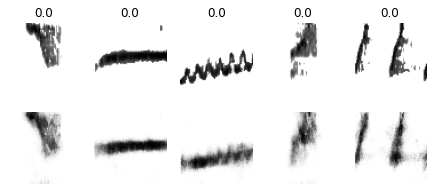

In [187]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=train_ground, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.title(str(cat[image_index]))
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
         
show_reconstructions(stacked_ae) 
#show_reconstructions1(stacked_ae) 



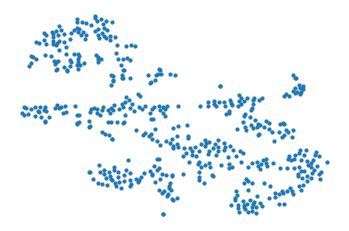

In [186]:
np.random.seed(42)

from sklearn.manifold import TSNE
X_valid=train_ground

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
#plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], s=10, cmap="tab10")
plt.axis("off")
plt.show()